# Examples of using visualisation tools

In [1]:
import scona as scn
import scona.datasets as datasets
import numpy as np
import networkx as nx
import pandas as pd

In [2]:
# Read in sample data from the NSPN WhitakerVertes PNAS 2016 paper.
df, names, covars, centroids = datasets.NSPN_WhitakerVertes_PNAS2016.import_data()

# calculate residuals of the matrix df for the columns of names
df_res = scn.create_residuals_df(df, names, covars)

# create a correlation matrix over the columns of df_res
M = scn.create_corrmat(df_res, method='pearson')

# Initialise a weighted graph G from the correlation matrix M
G = scn.BrainNetwork(network=M, parcellation=names, centroids=centroids)

H = G.threshold(2)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

-----------------------------------------------------------------------

## Implementation of plot_degree_dist

In [4]:
degrees = np.array(list(dict(H.degree()).values()))

In [5]:
degrees

array([ 7,  6,  1, 25, 25, 10, 18,  6,  7,  4,  4,  3, 10, 12,  5,  5, 11,
       11,  9, 10,  5,  2,  1,  7,  1,  9,  4,  3,  6,  1,  2, 11,  6,  6,
       11,  5,  7, 13,  4, 15,  6,  2, 12,  7,  7,  3,  2,  2,  1,  3,  3,
        4,  2,  2,  1,  1,  3,  2,  2,  3,  4,  3,  2,  8,  2,  3, 11, 11,
        8,  4,  2,  5,  1, 14,  3, 13,  5, 10,  8,  1,  1,  3,  4,  4,  1,
       11, 19,  3,  6,  6,  1,  4,  5,  3,  3,  4,  3,  3,  5,  3, 17, 10,
       12,  6, 24, 17,  8, 11,  1,  6, 10, 22,  8,  8, 20,  3, 20,  9, 15,
       12, 16,  7, 13,  9,  1, 12, 10,  4, 12,  5,  7,  2,  3,  2,  1,  1,
        3,  1,  6,  1,  1,  1,  4,  1,  5,  1,  4,  2,  3,  1,  2,  2,  5,
        3,  1,  2, 15,  6,  7, 14,  3,  3,  2,  2,  1,  2,  2,  2,  4,  9,
        3, 14,  6,  4,  2,  1,  4,  1,  8,  1,  9,  6,  7,  2,  2,  3,  1,
        3, 14,  4, 15,  2,  3,  8,  6,  8,  7, 10,  3,  1,  2,  1,  2,  3,
        1,  5,  6,  6,  5, 11,  3,  6,  4,  1,  1,  1,  4,  5,  1,  1,  2,
       15,  6,  1, 10,  2

In [10]:
# add seed for generating Erdos..
import random

In [11]:
# calculate another graph
nodes = len(H.nodes())
cost = H.number_of_edges() * 2.0 / (nodes*(nodes-1))
G_ER = nx.erdos_renyi_graph(nodes, cost, seed=10)

In [12]:
# calculate the degrees for the ER graph
degrees_ER = np.array(list(dict(G_ER.degree()).values()))

In [13]:
degrees_ER

array([ 5,  8,  8,  6,  6,  7,  7,  4,  3,  6,  4, 10,  5,  5,  5,  7,  5,
        5,  5,  5,  9,  4,  7,  7, 10,  3,  4, 10,  8,  7,  4,  9,  5,  9,
        6,  9,  5,  6,  7,  8, 13,  6,  7,  7,  5,  2,  4, 10, 10,  5, 10,
        4,  6,  5,  6,  4,  6,  6,  3,  3,  6,  1,  9,  7, 10,  5,  6,  4,
        7,  9,  9, 10,  8,  6,  5,  4,  8,  6,  4,  6,  6,  3,  6,  6,  9,
        8,  9,  4,  3,  8, 11,  4,  6,  6,  9,  9, 12,  3,  4,  4,  5,  6,
        9,  5,  7,  4,  4,  9,  6,  3, 13,  7,  6,  5,  6,  4,  3,  7,  9,
        6,  4,  7,  9, 10,  7,  6,  4,  3,  4, 10, 10,  4,  4,  6,  3,  3,
        4,  3,  5,  7,  5,  4,  5,  2,  7, 11,  4,  3,  7,  3,  3,  4,  6,
       11,  6,  4,  6,  6,  9,  5,  5,  6,  3, 10,  7,  8,  5,  7,  9,  5,
        3,  7,  8,  6,  2,  4,  8,  3,  6, 12, 10,  4,  5,  7,  5,  4,  8,
        7,  5,  4,  7,  4,  6,  5,  4,  7,  3,  7,  6,  3,  6,  5,  8,  4,
        5,  3,  7,  7,  5,  8,  5,  4, 11,  4,  6,  3,  4, 12,  7, 12,  8,
       10,  8, 12,  7,  8

In [43]:
testGap = np.append(degrees, [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [44]:
testGap

array([ 7,  6,  1, 25, 25, 10, 18,  6,  7,  4,  4,  3, 10, 12,  5,  5, 11,
       11,  9, 10,  5,  2,  1,  7,  1,  9,  4,  3,  6,  1,  2, 11,  6,  6,
       11,  5,  7, 13,  4, 15,  6,  2, 12,  7,  7,  3,  2,  2,  1,  3,  3,
        4,  2,  2,  1,  1,  3,  2,  2,  3,  4,  3,  2,  8,  2,  3, 11, 11,
        8,  4,  2,  5,  1, 14,  3, 13,  5, 10,  8,  1,  1,  3,  4,  4,  1,
       11, 19,  3,  6,  6,  1,  4,  5,  3,  3,  4,  3,  3,  5,  3, 17, 10,
       12,  6, 24, 17,  8, 11,  1,  6, 10, 22,  8,  8, 20,  3, 20,  9, 15,
       12, 16,  7, 13,  9,  1, 12, 10,  4, 12,  5,  7,  2,  3,  2,  1,  1,
        3,  1,  6,  1,  1,  1,  4,  1,  5,  1,  4,  2,  3,  1,  2,  2,  5,
        3,  1,  2, 15,  6,  7, 14,  3,  3,  2,  2,  1,  2,  2,  2,  4,  9,
        3, 14,  6,  4,  2,  1,  4,  1,  8,  1,  9,  6,  7,  2,  2,  3,  1,
        3, 14,  4, 15,  2,  3,  8,  6,  8,  7, 10,  3,  1,  2,  1,  2,  3,
        1,  5,  6,  6,  5, 11,  3,  6,  4,  1,  1,  1,  4,  5,  1,  1,  2,
       15,  6,  1, 10,  2

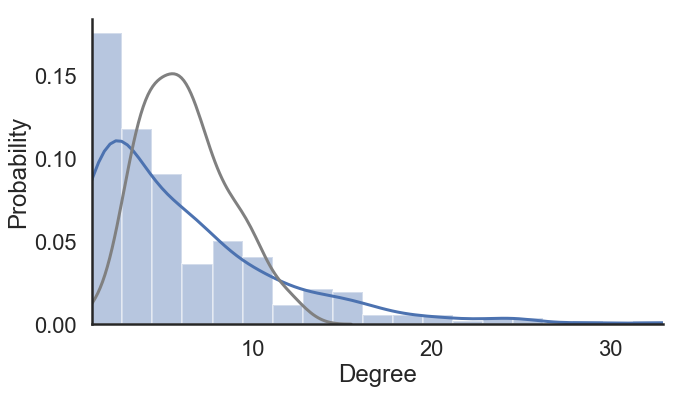

In [17]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Set the seaborn context and style
sns.set(style="white")
sns.set_context("poster", font_scale=1)

# Plot the read degrees and the ER degrees
ax1 = sns.distplot(degrees)

ax2 = sns.kdeplot(degrees_ER, color="grey")

# Fix the x and y axis limits - wihtout the gap between the 1st column and x = 0 - start from 1
ax.set_xlim((1, max(degrees)))

# ax.set(xlim=(1,max(degrees)))                # Ebat' raboraet!!!

# Make sure there aren't too many bins!
ax.locator_params(nbins=5)

# Set the x and y axis labels
ax.set_xlabel("Degree")
ax.set_ylabel("Probability")

sns.despine()

fig.tight_layout()

# fig.savefig("degree_dist", bbox_inches=0, dpi=100)

In [15]:
# set the seaborn style and context in the beginning!
sns.set(style="white")
sns.set_context("poster", font_scale=1)

### Test the degree distribution from the function

In [28]:
import importlib.util
spec = importlib.util.spec_from_file_location("plot_degree_dist", "/home/pilot/GSoC/scona/scona/visualisations.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)

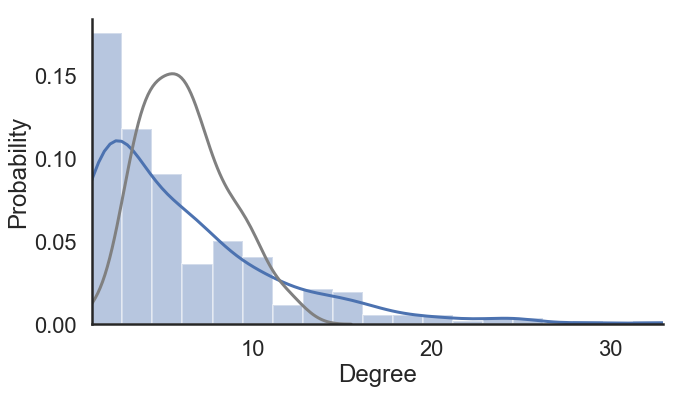

In [29]:
foo.plot_degree_dist(H, binomial_graph=True)

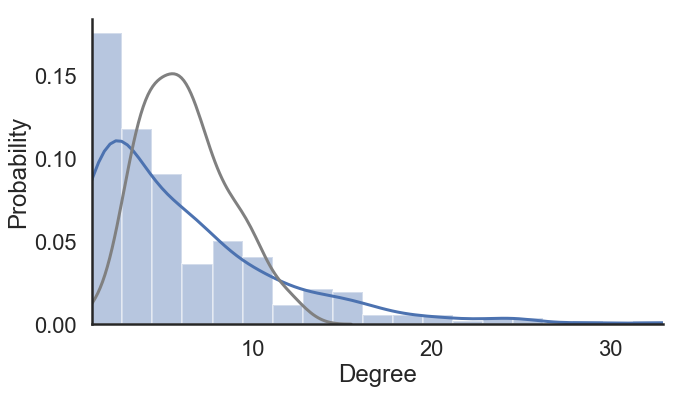

In [30]:
foo.plot_degree_dist(H, binomial_graph=True)

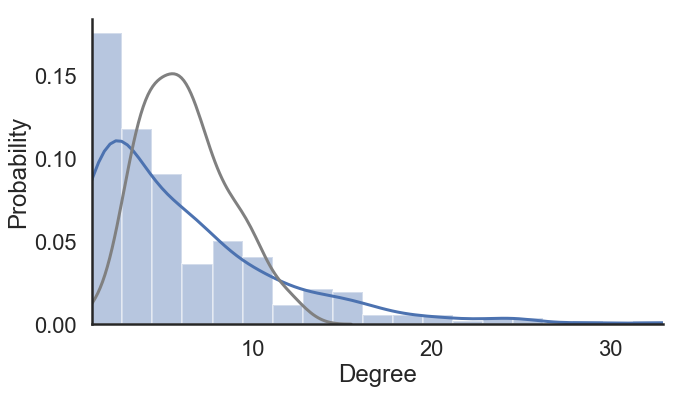

In [31]:
foo.plot_degree_dist(H, binomial_graph=True)